### 한국어  형태소 분석기

- Hannaum
- Kkma
- Komoran
- Mecab
- Okt

In [1]:
from konlpy.tag import Okt

In [2]:
okt = Okt()

In [4]:
okt = Okt()

In [5]:
data = '오늘 날씨가 추워서 기분이 좋지않다'

In [6]:
# 형태소 단위 분석
okt.morphs(data)

['오늘', '날씨', '가', '추워서', '기분', '이', '좋지', '않다']

In [7]:
# 명사 추출
okt.nouns(data)

['오늘', '날씨', '기분']

In [8]:
# 어절 추출
okt.phrases(data)

['오늘', '오늘 날씨', '기분', '날씨']

In [10]:
# 형태소 분석 + 품사 태깅
okt.pos(data)

[('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('추워서', 'Adjective'),
 ('기분', 'Noun'),
 ('이', 'Josa'),
 ('좋지', 'Adjective'),
 ('않다', 'Verb')]

In [11]:
from collections import Counter
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('ratings.txt', delimiter = '\t')
df

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [28]:
x = df['document'][:1000]

In [29]:
n = []

for i in x:
    n.append(i)

In [30]:
okt = Okt()
noun = okt.nouns(str(n))
count = Counter(noun)

In [31]:
noun_list = count.most_common(100)
for v in noun_list : 
    print(v)

('영화', 326)
('정말', 89)
('최고', 79)
('연기', 62)
('진짜', 58)
('감동', 58)
('생각', 47)
('이', 47)
('그', 39)
('것', 37)
('때', 35)
('보고', 34)
('수', 34)
('드라마', 33)
('다시', 32)
('내', 32)
('점', 32)
('거', 31)
('사람', 30)
('지금', 27)
('더', 27)
('평점', 26)
('명작', 26)
('마음', 25)
('마지막', 25)
('사랑', 24)
('재미', 24)
('스토리', 24)
('하나', 23)
('말', 23)
('볼', 23)
('나', 22)
('작품', 22)
('완전', 21)
('현실', 21)
('왜', 20)
('배우', 20)
('듯', 19)
('느낌', 19)
('남자', 19)
('추천', 19)
('뭐', 18)
('매력', 17)
('굿', 16)
('중', 16)
('한번', 15)
('장면', 15)
('이야기', 15)
('난', 15)
('감독', 15)
('한국', 15)
('저', 14)
('꼭', 14)
('액션', 14)
('이영화', 14)
('편', 14)
('주인공', 13)
('좀', 13)
('역시', 12)
('속', 12)
('또', 12)
('정도', 12)
('대박', 12)
('연기력', 12)
('처음', 11)
('대한', 11)
('기대', 11)
('알', 11)
('인생', 11)
('모습', 11)
('개인', 11)
('가장', 11)
('이해', 10)
('인간', 10)
('최고다', 10)
('음악', 10)
('자신', 10)
('내용', 10)
('모든', 10)
('대해', 10)
('도', 9)
('제', 9)
('전', 9)
('만', 9)
('기억', 9)
('여운', 9)
('봄', 9)
('그냥', 9)
('가족', 9)
('요', 9)
('때문', 9)
('이건', 9)
('짱', 9)
('계속', 9)
('무

### 단어리스트 만들기

In [32]:
word_list = df['document'][:3000]

In [33]:
tag = []

for s in word_list :
    morph = okt.pos(s)
    tag.append(morph)

In [34]:
tag

[[('어릴', 'Verb'),
  ('때', 'Noun'),
  ('보고', 'Noun'),
  ('지금', 'Noun'),
  ('다시', 'Noun'),
  ('봐도', 'Verb'),
  ('재밌어요', 'Adjective'),
  ('ㅋㅋ', 'KoreanParticle')],
 [('디자인', 'Noun'),
  ('을', 'Josa'),
  ('배우는', 'Verb'),
  ('학생', 'Noun'),
  ('으로', 'Josa'),
  (',', 'Punctuation'),
  ('외국', 'Noun'),
  ('디자이너', 'Noun'),
  ('와', 'Josa'),
  ('그', 'Noun'),
  ('들', 'Suffix'),
  ('이', 'Josa'),
  ('일군', 'Noun'),
  ('전통', 'Noun'),
  ('을', 'Josa'),
  ('통해', 'Noun'),
  ('발전', 'Noun'),
  ('해가는', 'Verb'),
  ('문화', 'Noun'),
  ('산업', 'Noun'),
  ('이', 'Josa'),
  ('부러웠는데', 'Adjective'),
  ('.', 'Punctuation'),
  ('사실', 'Noun'),
  ('우리나라', 'Noun'),
  ('에서도', 'Josa'),
  ('그', 'Noun'),
  ('어려운', 'Adjective'),
  ('시절', 'Noun'),
  ('에', 'Josa'),
  ('끝', 'Noun'),
  ('까지', 'Josa'),
  ('열정', 'Noun'),
  ('을', 'Josa'),
  ('지킨', 'Verb'),
  ('노라노', 'Noun'),
  ('같은', 'Adjective'),
  ('전통', 'Noun'),
  ('이', 'Josa'),
  ('있어', 'Adjective'),
  ('저', 'Noun'),
  ('와', 'Josa'),
  ('같은', 'Adjective'),
  ('사람', 'Noun'),
  ('들', '

In [35]:
# 명사 추출
noun_list = []
for s in tag:
    for word, tag in s :
        if tag in['Noun']:
            noun_list.append(word)

In [36]:
noun_list

['때',
 '보고',
 '지금',
 '다시',
 '디자인',
 '학생',
 '외국',
 '디자이너',
 '그',
 '일군',
 '전통',
 '통해',
 '발전',
 '문화',
 '산업',
 '사실',
 '우리나라',
 '그',
 '시절',
 '끝',
 '열정',
 '노라노',
 '전통',
 '저',
 '사람',
 '꿈',
 '수',
 '것',
 '폴리스스토리',
 '시리즈',
 '부터',
 '뉴',
 '하나',
 '최고',
 '연기',
 '진짜',
 '개',
 '생각',
 '몰입',
 '진짜',
 '영화',
 '안개',
 '밤하늘',
 '초승달',
 '영화',
 '사랑',
 '사람',
 '라면',
 '처음',
 '끝',
 '영화',
 '완전',
 '감동',
 '다시',
 '감동',
 '개',
 '전쟁',
 '빠',
 '보고',
 '굿',
 '바보',
 '병',
 '쉰',
 '내',
 '나이',
 '영화',
 '지금',
 '나',
 '감동',
 '훗날',
 '다시',
 '사하나',
 '그',
 '감정',
 '이해',
 '고질',
 '무',
 '능',
 '영화',
 '오페라',
 '작품',
 '극단',
 '평',
 '갈림',
 '수',
 '듯',
 '도',
 '반전',
 '제',
 '평점',
 '왜',
 '긴장감',
 '스릴',
 '감',
 '진짜',
 '최고',
 '진짜',
 '전장',
 '공포',
 '전',
 '고시',
 '터',
 '소재',
 '뿐',
 '관련',
 '단연',
 '최고',
 '가면',
 '갈수록',
 '더욱',
 '드',
 '밀회',
 '화이팅',
 '생각',
 '수작',
 '일본',
 '영화',
 '최고',
 '마음',
 '임팩트',
 '일품',
 '만',
 '제대로',
 '범죄',
 '스릴러',
 '때',
 '사랑',
 '도',
 '마디',
 '말',
 '밤',
 '잠',
 '때',
 '징텅',
 '교복',
 '션',
 '이의',
 '볼펜',
 '자국',
 '역시',
 '미처',
 '전하',
 '못',
 '마음',
 '형태',
 '거',

#### 두글자 이상 단어만 추출

In [38]:
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:10]

['보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '일군', '전통', '통해']

#### 단어별 개수 세기

In [39]:
counts = Counter(noun_list)
tags = counts.most_common(1000)
tags

[('영화', 985),
 ('정말', 265),
 ('최고', 230),
 ('진짜', 184),
 ('감동', 155),
 ('연기', 142),
 ('생각', 140),
 ('드라마', 121),
 ('보고', 119),
 ('사람', 110),
 ('평점', 103),
 ('다시', 94),
 ('마지막', 80),
 ('사랑', 78),
 ('스토리', 69),
 ('작품', 67),
 ('지금', 66),
 ('배우', 65),
 ('명작', 61),
 ('재미', 59),
 ('마음', 56),
 ('하나', 54),
 ('완전', 53),
 ('이영화', 52),
 ('추천', 50),
 ('장면', 49),
 ('매력', 49),
 ('느낌', 47),
 ('감독', 47),
 ('내용', 46),
 ('현실', 46),
 ('액션', 45),
 ('이야기', 43),
 ('그냥', 43),
 ('가슴', 43),
 ('주인공', 42),
 ('정도', 42),
 ('이해', 40),
 ('한번', 40),
 ('인생', 38),
 ('역시', 37),
 ('음악', 37),
 ('처음', 36),
 ('기억', 35),
 ('여운', 35),
 ('남자', 34),
 ('눈물', 34),
 ('우리', 34),
 ('인간', 33),
 ('시간', 33),
 ('대박', 32),
 ('한국', 32),
 ('결말', 30),
 ('가족', 30),
 ('모습', 29),
 ('연기력', 29),
 ('최고다', 27),
 ('대한', 26),
 ('영상', 26),
 ('보기', 26),
 ('아이', 26),
 ('가장', 26),
 ('소재', 25),
 ('모든', 25),
 ('연출', 25),
 ('여자', 25),
 ('시리즈', 24),
 ('모두', 24),
 ('개인', 24),
 ('부분', 24),
 ('반전', 23),
 ('때문', 23),
 ('계속', 23),
 ('무엇', 23),
 ('당시', 22),
 ('공감

In [40]:
dic= dict(count.most_common(1000))
dic

{'영화': 326,
 '정말': 89,
 '최고': 79,
 '연기': 62,
 '진짜': 58,
 '감동': 58,
 '생각': 47,
 '이': 47,
 '그': 39,
 '것': 37,
 '때': 35,
 '보고': 34,
 '수': 34,
 '드라마': 33,
 '다시': 32,
 '내': 32,
 '점': 32,
 '거': 31,
 '사람': 30,
 '지금': 27,
 '더': 27,
 '평점': 26,
 '명작': 26,
 '마음': 25,
 '마지막': 25,
 '사랑': 24,
 '재미': 24,
 '스토리': 24,
 '하나': 23,
 '말': 23,
 '볼': 23,
 '나': 22,
 '작품': 22,
 '완전': 21,
 '현실': 21,
 '왜': 20,
 '배우': 20,
 '듯': 19,
 '느낌': 19,
 '남자': 19,
 '추천': 19,
 '뭐': 18,
 '매력': 17,
 '굿': 16,
 '중': 16,
 '한번': 15,
 '장면': 15,
 '이야기': 15,
 '난': 15,
 '감독': 15,
 '한국': 15,
 '저': 14,
 '꼭': 14,
 '액션': 14,
 '이영화': 14,
 '편': 14,
 '주인공': 13,
 '좀': 13,
 '역시': 12,
 '속': 12,
 '또': 12,
 '정도': 12,
 '대박': 12,
 '연기력': 12,
 '처음': 11,
 '대한': 11,
 '기대': 11,
 '알': 11,
 '인생': 11,
 '모습': 11,
 '개인': 11,
 '가장': 11,
 '이해': 10,
 '인간': 10,
 '최고다': 10,
 '음악': 10,
 '자신': 10,
 '내용': 10,
 '모든': 10,
 '대해': 10,
 '도': 9,
 '제': 9,
 '전': 9,
 '만': 9,
 '기억': 9,
 '여운': 9,
 '봄': 9,
 '그냥': 9,
 '가족': 9,
 '요': 9,
 '때문': 9,
 '이건': 9,
 '짱': 9,
 '계속': 9,
 '무

### 워드클라우드 생성

(-0.5, 595.5, 638.5, -0.5)

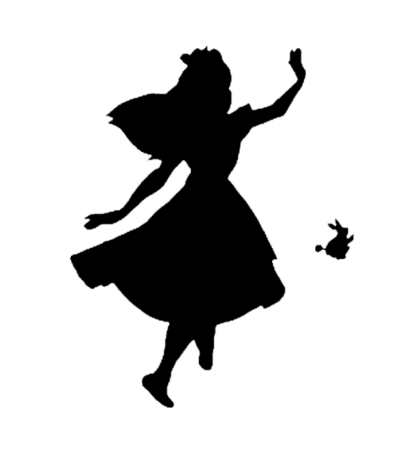

In [47]:
from PIL import Image # 워드클라우드용 마스크를 생성하기위한 라이브러리
from wordcloud import WordCloud
import matplotlib.pyplot as plt

image_file = 'alice.png'
img_file = Image.open(image_file)
alice_mask = np.array(img_file)

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)
plt.axis('off')

(-0.5, 595.5, 638.5, -0.5)

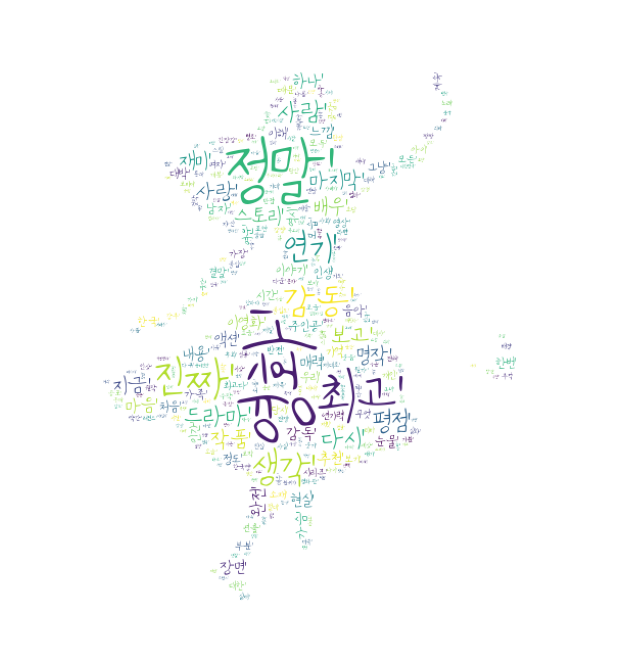

In [50]:
wordcloud = WordCloud(font_path='나눔손글씨 버드나무.ttf',
                     background_color='white',
                     max_words=1000,
                     mask=alice_mask)

wc = wordcloud.generate(str(tags))
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')